In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
# task 1

df1 = pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')
df2 = pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3 = pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df4 = pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')

In [3]:
df1

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan
...,...,...
3538,Austin,United States
3539,Avellaneda,Argentina
3540,Avignon,France
3541,Ayacucho,Peru


In [4]:
df2

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55
...,...,...,...,...,...,...,...
211,Davao,0.79,1.90,3.17,0.84,554.18,158.34
212,Karachi,1.00,3.27,5.11,0.67,197.78,139.60
213,Lahore,1.23,3.27,6.54,0.66,206.08,132.95
214,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22


In [5]:
df3

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86
...,...,...,...,...,...,...,...
211,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34
212,Tokyo,80.00,47.57,71.53,30.54,69.29,13.91
213,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86
214,Marbella,81.96,60.14,83.64,32.27,75.24,9.11


In [6]:
df4

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [7]:
for i in [df1, df2, df3, df4]:
    print(i.shape)

(3543, 2)
(216, 7)
(216, 7)
(26569, 11)


In [8]:
for i in [df1, df2, df3, df4]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     3543 non-null   object
 1   Country  3540 non-null   object
dtypes: object(2)
memory usage: 55.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   216 non-null    object 
 1   Cappuccino             216 non-null    float64
 2   Cinema                 216 non-null    float64
 3   Wine                   216 non-null    float64
 4   Gasoline               216 non-null    float64
 5   Avg Rent               216 non-null    float64
 6   Avg Disposable Income  216 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 21

In [9]:
df4.rename(columns = {'city':'City'}, inplace = True)

In [10]:
df4.sort_values(by = ['population'], ascending =False , inplace = True)

In [11]:
df4.drop_duplicates(subset = ['City'],keep = 'first', inplace = True)

In [12]:
dfa = pd.merge(df1,df2,on = 'City')
dfb = pd.merge(df3,df4,on = 'City')
df = pd.merge(dfa,dfb,on = 'City')

In [13]:
df

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,Orlando,28.4772,-81.3369,United States,US,USA,Florida,NaN,1822394.0,1840015099
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,primary,693494.0,1578324706
2,Ottawa,Canada,2.39,7.65,9.56,0.80,1020.02,2900.68,87.69,91.85,...,Ottawa,45.4247,-75.6950,Canada,CA,CAN,Ontario,NaN,989567.0,1124399363
3,Oxford,United Kingdom,2.49,7.97,7.97,1.36,1494.67,1693.96,80.94,50.33,...,Oxford,51.7519,-1.2578,United Kingdom,GB,GBR,Oxfordshire,NaN,154600.0,1826689568
4,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,primary,2011388.0,1218441993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Athens,Greece,2.98,6.82,5.97,1.45,468.87,681.99,76.78,26.05,...,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,primary,664046.0,1300715560
185,Athens,United States,2.98,6.82,5.97,1.45,468.87,681.99,76.78,26.05,...,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,primary,664046.0,1300715560
186,Atlanta,United States,2.21,6.37,6.53,0.61,1046.03,2288.19,84.92,80.83,...,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1840013660
187,Auckland,New Zealand,2.20,8.82,8.27,1.18,1432.98,2149.47,86.43,49.02,...,Auckland,-36.8500,174.7833,New Zealand,NZ,NZL,Auckland,admin,1467800.0,1554435911


In [14]:
df.shape

(189, 24)

In [15]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [16]:
numerics = df.drop(columns = ['lat', 'lng', 'id'])
df[numerics.columns] = StandardScaler().fit_transform(df[numerics.columns])
df

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,0.771053,1.256667,-0.053183,-0.186010,0.104033,-1.026946,0.083563,0.654451,0.687492,1.273496,...,0.771053,28.4772,-81.3369,1.268799,1.507911,1.537301,-0.717546,1.199041,-0.342296,1840015099
1,0.790281,0.182681,1.840785,0.711960,1.495633,1.538033,1.334086,1.533041,0.342337,0.339732,...,0.790281,59.9111,10.7528,0.227222,0.606028,0.600318,0.615759,0.359712,-0.516779,1578324706
2,0.809509,-1.249301,0.528536,0.112751,0.695463,-0.632334,-0.149842,1.644367,1.182715,2.318949,...,0.809509,45.4247,-75.6950,-1.214961,-1.068899,-1.060697,0.594596,1.199041,-0.471018,1124399363
3,0.828737,1.216890,0.663819,0.166764,0.234495,0.946115,0.556879,0.297741,0.169759,0.230055,...,0.828737,51.7519,-1.2578,1.228738,-0.424696,-0.421845,0.636923,1.199041,-0.600070,1826689568
4,0.982561,-0.891305,-1.054280,-0.682256,-0.180086,-2.069850,-1.206208,-1.373745,-1.899672,-1.585652,...,0.982561,-0.2186,-78.5097,-0.894476,-0.682377,-0.677386,0.700413,0.359712,-0.313085,1218441993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1.517079,-0.652642,1.326708,-0.027346,-0.345338,1.199794,-0.970466,-0.831555,-0.454522,-0.991485,...,-1.517079,37.9794,23.7161,-0.654112,-0.381750,-0.379255,-1.542925,0.359712,-0.521331,1300715560
185,-1.517079,1.256667,1.326708,-0.027346,-0.345338,1.199794,-0.970466,-0.831555,-0.454522,-0.991485,...,-1.517079,37.9794,23.7161,-0.654112,-0.381750,-0.379255,-1.542925,0.359712,-0.521331,1300715560
186,-1.497851,1.256667,0.285026,-0.103302,-0.182985,-1.167879,-0.111115,0.960866,0.767028,1.764526,...,-1.497851,33.7627,-84.4224,1.268799,1.507911,1.537301,-0.632892,-1.318945,0.218293,1840013660
187,-1.478623,0.103126,0.271497,0.310237,0.321470,0.438756,0.465027,0.806063,0.993630,0.164148,...,-1.478623,-36.8500,174.7833,0.147101,0.648974,0.642908,-1.521761,-1.318945,-0.397102,1554435911


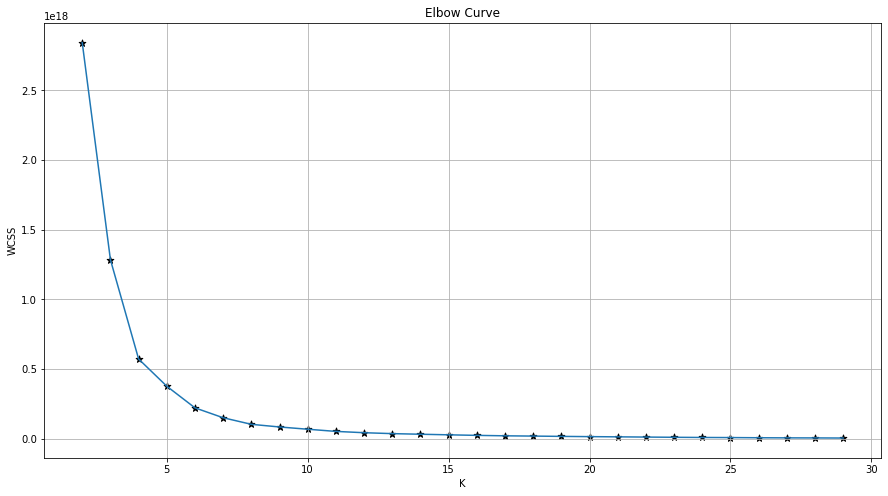

In [17]:
# task 2

wcss = []
for k in range(2,30):
    km = KMeans(n_clusters = k , random_state = 42)
    km.fit(df)
    wcss.append(km.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(2,30) , wcss)
plt.scatter(range(2,30) , wcss , color = 'black' , marker = '*' , s = 50)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Curve');

For n_clusters = 2 The average silhouette_score is : 0.6988489865639244
For n_clusters = 3 The average silhouette_score is : 0.6396123563235503
For n_clusters = 4 The average silhouette_score is : 0.6660876042495328
For n_clusters = 5 The average silhouette_score is : 0.6778772288161452
For n_clusters = 6 The average silhouette_score is : 0.6919536394275706
For n_clusters = 7 The average silhouette_score is : 0.7041877439876765


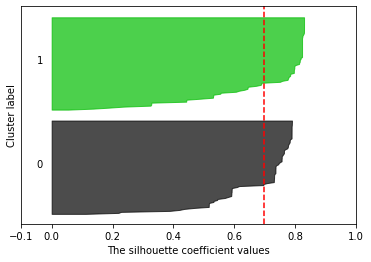

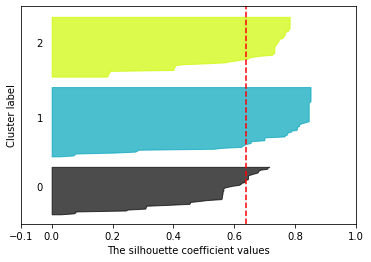

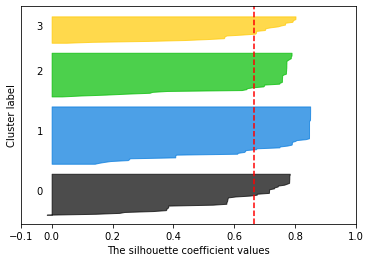

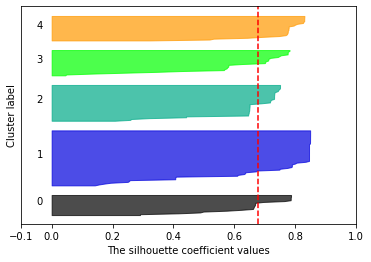

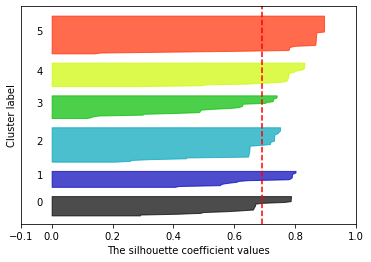

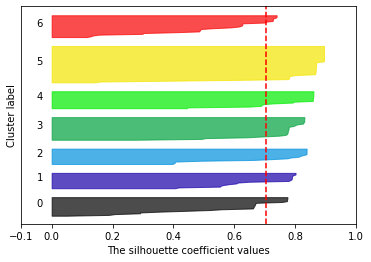

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
         # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
     
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [19]:
# task 3

k = KMeans(n_clusters=3)
k.fit(df)
cent = k.cluster_centers_
lab = k.labels_

cent, lab

(array([[ 1.64051425e-01, -1.40217008e-01, -1.81038967e-01,
         -1.99678550e-01,  5.94649676e-02,  1.93367149e-01,
         -9.40777757e-02, -3.39887824e-01, -3.06955595e-01,
         -4.32959077e-01, -1.66316796e-01,  1.55648758e-02,
         -4.40124064e-01,  1.44981920e-01,  1.64051425e-01,
          2.88031059e+01,  4.76712275e+01, -1.77311657e-01,
          2.11085077e-01,  1.96129332e-01,  1.38126384e-01,
         -1.83382764e-01,  4.24924427e-01,  1.44355572e+09],
        [-2.24385811e-01,  9.49199297e-01,  7.69817512e-02,
          1.43475356e-01, -2.74486038e-02, -1.23070930e-01,
          9.37832122e-02,  1.72995927e-01,  1.76045547e-01,
          2.95247871e-01, -5.87342216e-02,  9.62759046e-02,
          1.71082305e-01,  5.40873305e-02, -2.24385811e-01,
          3.59323324e+01, -1.66492378e+01,  1.04684128e+00,
          6.76251373e-01,  6.83196091e-01, -2.65674988e-01,
          1.44209003e-01, -1.15765278e-01,  1.78214608e+09],
        [ 1.28717614e-01, -9.85776259e

In [20]:
# k = 2
k2 = KMeans(n_clusters=2)
k2.fit(df)
lab2 = k2.labels_

In [21]:
# k = 4
k3 = KMeans(n_clusters=4)
k3.fit(df)
lab3=k3.labels_

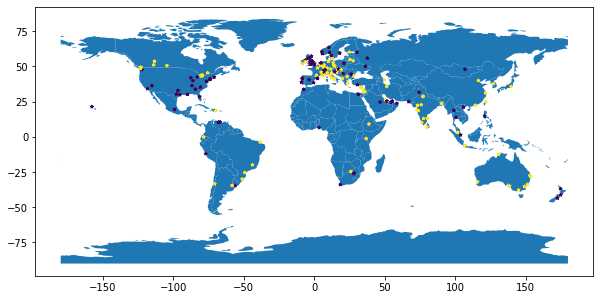

In [22]:
geometry=[Point(xy) for xy in zip(df['lng'],df['lat'])]
gdf=GeoDataFrame(df,geometry=geometry)
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(ax=world.plot(figsize=(10,5)),marker="*",c=lab2.astype(float),markersize=10);

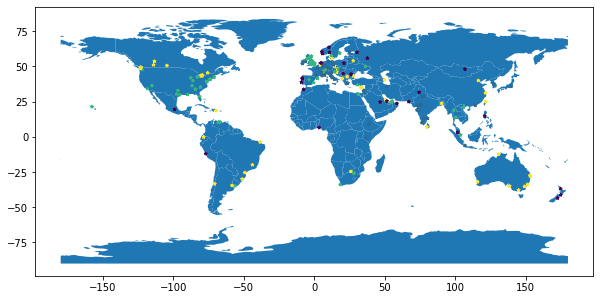

In [23]:
geometry=[Point(xy) for xy in zip(df['lng'],df['lat'])]
gdf=GeoDataFrame(df,geometry=geometry)
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(ax=world.plot(figsize=(10,5)),marker="*",c=lab3.astype(float),markersize=10);